In [42]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import joblib


In [43]:
# Helper function to safely evaluate and convert string to array
def convert_string_to_array(s):
    s = s.replace('\x00', '')  # Remove null bytes
    try:
        return np.array(eval(s))
    except Exception as e:
        print(f"Error parsing string: {s}. Error: {e}")
        # Returning an array of zeros with the expected length (768)
        return np.zeros(768)

In [44]:
# Load data
train_df = pd.read_csv('E:/BE Project/Classify_Me/train.csv')
valid_df = pd.read_csv('E:/BE Project/Classify_Me/validation.csv')
test_df = pd.read_csv('E:/BE Project/Classify_Me/test.csv')

In [45]:
# # Convert features and labels
# X_train = np.array([convert_string_to_array(row[0]) for row in train_df.values])
# y_train = train_df.iloc[:, 1].astype(float).values

# X_valid = np.array([convert_string_to_array(row[0]) for row in valid_df.values])
# y_valid = valid_df.iloc[:, 1].astype(float).values

# X_test = np.array([convert_string_to_array(row[0]) for row in test_df.values])


X_train = np.array([convert_string_to_array(row) for row in train_df.iloc[:, :-1].values.flatten()])
y_train = train_df.iloc[:, -1].astype(float).values
X_valid = np.array([convert_string_to_array(row) for row in valid_df.iloc[:, :-1].values.flatten()])
y_valid = valid_df.iloc[:, -1].astype(float).values
X_test = np.array([convert_string_to_array(row) for row in test_df.values.flatten()])



In [46]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
# Save the scaler
joblib.dump(scaler, 'E:/BE Project/Classify_Me/scaler.pkl')

['E:/BE Project/Classify_Me/scaler.pkl']

In [47]:


model = Sequential([
    Dense(128, input_dim=768, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [48]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [49]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=32)


Epoch 1/50
379/379 [==============================] - 2s 3ms/step - loss: -62.1169 - accuracy: 0.3575 - val_loss: -387.0355 - val_accuracy: 0.4040
Epoch 2/50
379/379 [==============================] - 1s 2ms/step - loss: -2815.7695 - accuracy: 0.4139 - val_loss: -6854.4585 - val_accuracy: 0.4133
Epoch 3/50
379/379 [==============================] - 1s 2ms/step - loss: -15947.8477 - accuracy: 0.4151 - val_loss: -26441.5410 - val_accuracy: 0.3987
Epoch 4/50
379/379 [==============================] - 1s 2ms/step - loss: -44717.6953 - accuracy: 0.4085 - val_loss: -62278.4062 - val_accuracy: 0.4053
Epoch 5/50
379/379 [==============================] - 1s 2ms/step - loss: -92812.1172 - accuracy: 0.4029 - val_loss: -117484.2578 - val_accuracy: 0.3780
Epoch 6/50
379/379 [==============================] - 1s 2ms/step - loss: -161496.0000 - accuracy: 0.4045 - val_loss: -193296.2188 - val_accuracy: 0.4187
Epoch 7/50
379/379 [==============================] - 1s 2ms/step - loss: -254841.0469 - acc

In [50]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
valid_loss, valid_accuracy = model.evaluate(X_valid, y_valid)
print(f'NN Train Accuracy: {train_accuracy}')
print(f'NN Validation Accuracy: {valid_accuracy}')

47/47 [==============================] - 0s 1ms/step - loss: -40345112.0000 - accuracy: 0.3933
NN Train Accuracy: 0.3832755386829376
NN Validation Accuracy: 0.3933333456516266


In [51]:
output_df = pd.DataFrame(test_predictions)
new_df=test_df.merge(output_df,left_index=True,right_index=True
)
new_df.columns=['Embedded','Labels']
new_df.to_csv('E:/BE Project/Classify_Me/test_predictions.csv',index=False)

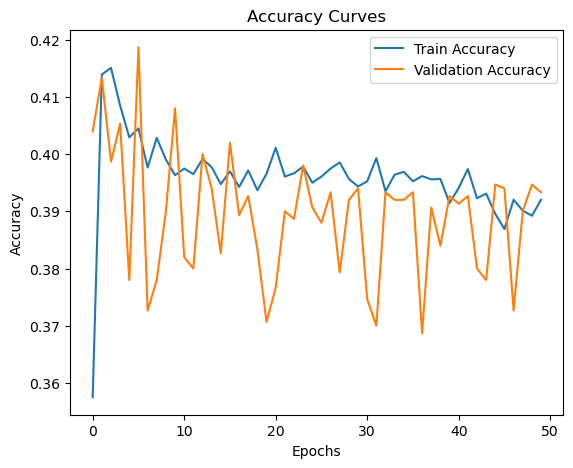

In [52]:
# Plotting the training and validation accuracy and loss
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()

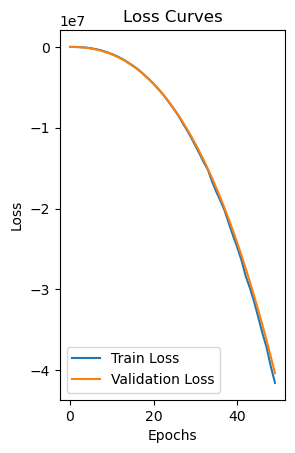

In [53]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

plt.savefig('E:/BE Project/Classify_Me/training_validation_curves.png')
plt.show()